# Attività 3 cfu

**Dunn Index**

In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install validclust

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install clusteval

In [4]:
from sklearn.cluster import KMeans
from validclust import dunn
from sklearn.metrics import pairwise_distances
from clusteval import clusteval

# Artificial data

**Test 1**

In [5]:
n_righe = 150
n_colonne = 150

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test1 = pd.concat([df, df2], axis=0, ignore_index=True)

test1

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
kmeans = KMeans(n_clusters=2, random_state=42)
#kmeans.fit(test1)
#test1['Cluster'] = kmeans.labels_
labels = kmeans.fit_predict(test1)

dist = pairwise_distances(test1)
index1 = dunn(dist, labels)

print('Dunn Index =', index1)

Dunn Index = inf


C:\Users\Samsung\anaconda3\lib\site-packages\validclust\indices.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  return min(inter_dists) / max(intra_dists)


**Test 2**

In [11]:
n_righe = 150
n_colonne = 150
n_righe_noise = 3

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, n_colonne)

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test2 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test2.index, size=n_righe_noise, replace=False)
test2.loc[indici_random] = rumore

test2

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
298,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test2)
    dist = pairwise_distances(test2)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index2 = index_0                 
print('Dunn Index =', index_0, 'con', k,'cluster')

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\site-

Dunn Index = 37900611.07446212 con 5 cluster


C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


The parameter random state doesn't change the valuation

**Test 3**

In [14]:
n_righe = 150
n_colonne = 150
n_righe_noise = 6

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, n_colonne)

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test3 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test3.index, size=n_righe_noise, replace=False)
test3.loc[indici_random] = rumore

test3

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
298,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test3)
    dist = pairwise_distances(test3)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index3 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 36916992.64750718 con 8 cluster


C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Samsung\anaconda3\lib\si

Changing the nummber of clusters the valuation is much better

**Test 4**

In [17]:
n_righe = 150
n_colonne = 150
n_righe_noise = 12

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, n_colonne)

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test4 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test4.index, size=n_righe_noise, replace=False)
test4.loc[indici_random] = rumore

test4

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
298,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test4)
    dist = pairwise_distances(test4)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index4 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 38260272.08064264 con 14 cluster


**Test 5**

In [19]:
n_righe = 150
n_colonne = 150
n_righe_noise = 24

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, n_colonne)

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test5 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test5.index, size=n_righe_noise, replace=False)
test5.loc[indici_random] = rumore

test5

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
296,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
297,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
298,0.82114,0.592666,0.222458,0.305545,0.840553,0.060517,0.337501,0.103593,0.851071,0.54808,...,0.274577,0.524883,0.101866,0.918432,0.905028,0.073918,0.826187,0.219399,0.839306,0.771358


In [34]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test5)
    dist = pairwise_distances(test5)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index5 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 1.1646336930145884 con 3 cluster


**Test 6**

In [21]:
n_righe = 150
n_colonne = 150
n_righe_noise = 48

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, n_colonne)

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test7 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test7.index, size=n_righe_noise, replace=False)
test7.loc[indici_random] = rumore

test7

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.946206,0.858415,0.152451,0.688327,0.942265,0.621878,0.614474,0.563859,0.816867,0.719961,...,0.963691,0.352970,0.188016,0.467274,0.719488,0.347477,0.833553,0.767580,0.562431,0.100874
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.382386,0.319097,0.730727,0.372563,0.394258,0.445501,0.383562,0.568031,0.277452,0.303327,...,0.924985,0.917834,0.112258,0.708268,0.202207,0.833711,0.172582,0.093102,0.085887,0.963339
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
296,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
297,0.054246,0.112997,0.846455,0.891451,0.517463,0.011233,0.239948,0.071213,0.144289,0.235758,...,0.075439,0.827057,0.722193,0.556598,0.279303,0.387044,0.076000,0.512459,0.509765,0.866365
298,0.060240,0.525527,0.591340,0.907227,0.384365,0.068946,0.166570,0.438045,0.618315,0.510059,...,0.771033,0.049326,0.710468,0.644204,0.196929,0.857413,0.204487,0.341302,0.456454,0.082212


In [35]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test7)
    dist = pairwise_distances(test7)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index6 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 1.113308850758832 con 3 cluster


**Test 7**

In [23]:
n_righe = 150
n_colonne = 150
n_righe_noise = 96

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, n_colonne)

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test8 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test8.index, size=n_righe_noise, replace=False)
test8.loc[indici_random] = rumore

test8

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.059391,0.217604,0.146958,0.719863,0.866489,0.384031,0.122502,0.566462,0.808350,0.589078,...,0.052585,0.452804,0.942607,0.863363,0.692246,0.803821,0.844654,0.387345,0.611994,0.828628
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.201406,0.208637,0.681432,0.851994,0.155455,0.505855,0.919545,0.359015,0.603939,0.245027,...,0.285427,0.486236,0.139268,0.998883,0.405882,0.953670,0.669921,0.073688,0.849065,0.243014
296,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
297,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
298,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test8)
    dist = pairwise_distances(test8)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index7 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 1.081215928860283 con 3 cluster


Again.

**Test 8**

In [25]:
n_righe = 150
n_colonne = 150
n_righe_noise = 150

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, test1.shape[1])

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test9 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test9.index, size=n_righe_noise, replace=False)
test9.loc[indici_random] = rumore

test9

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.522466,0.171396,0.760647,0.707540,0.410534,0.701207,0.427411,0.605490,0.617489,0.292144,...,0.655622,0.572710,0.045318,0.290930,0.232949,0.798909,0.564751,0.746848,0.117164,0.059315
1,0.270675,0.010859,0.902319,0.592301,0.358451,0.806569,0.848513,0.446643,0.100787,0.338596,...,0.454435,0.716038,0.092822,0.975282,0.926177,0.402137,0.343362,0.357036,0.713316,0.676937
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.519223,0.602807,0.170270,0.192478,0.325825,0.595070,0.993477,0.424032,0.580491,0.334788,...,0.178362,0.809744,0.302645,0.783481,0.496188,0.133300,0.112173,0.846346,0.692224,0.015417
4,0.535674,0.659355,0.631773,0.803938,0.234998,0.160107,0.125475,0.668762,0.906129,0.415384,...,0.931867,0.187038,0.131536,0.435220,0.062234,0.499587,0.362839,0.725687,0.240025,0.821636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.715536,0.434106,0.468978,0.990767,0.947179,0.411208,0.084970,0.999764,0.408015,0.578381,...,0.807149,0.531165,0.706266,0.772925,0.393977,0.604269,0.254259,0.082721,0.892023,0.909367
296,0.825428,0.083132,0.533331,0.336122,0.671262,0.230020,0.135572,0.057785,0.102782,0.059355,...,0.244694,0.768741,0.975721,0.266404,0.424740,0.862668,0.950887,0.444269,0.319266,0.362378
297,0.343761,0.056809,0.450032,0.216176,0.040346,0.091367,0.839498,0.983299,0.729701,0.922574,...,0.565853,0.327740,0.471918,0.518425,0.865098,0.204279,0.534447,0.797530,0.155166,0.611739
298,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test9)
    dist = pairwise_distances(test9)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index8 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 1.0918159375638015 con 3 cluster


**Test 9**

In [27]:
n_righe = 150
n_colonne = 150
n_righe_noise = 270

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, test1.shape[1])

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test10 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test10.index, size=n_righe_noise, replace=False)
test10.loc[indici_random] = rumore

test10

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.856322,0.101885,0.713820,0.091058,0.419309,0.938415,0.206586,0.474919,0.700134,0.288896,...,0.694605,0.975752,0.848155,0.300458,0.906801,0.399767,0.913930,0.000132,0.091161,0.048062
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.076841,0.806685,0.057454,0.966018,0.948116,0.570461,0.631625,0.074412,0.692849,0.486021,...,0.565653,0.651999,0.150792,0.683007,0.926290,0.704516,0.210475,0.245043,0.215012,0.594858
3,0.716869,0.318727,0.855083,0.528945,0.032507,0.407144,0.119564,0.854172,0.830326,0.634435,...,0.983737,0.281880,0.212101,0.441865,0.499058,0.975405,0.233941,0.326709,0.062878,0.429234
4,0.091916,0.594159,0.929691,0.000043,0.605490,0.823035,0.804072,0.870333,0.712748,0.376243,...,0.222004,0.995535,0.994031,0.305282,0.495144,0.580340,0.525346,0.153456,0.517129,0.377292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.092406,0.703856,0.808427,0.242427,0.188816,0.114270,0.417874,0.286172,0.634643,0.521964,...,0.283028,0.002060,0.559496,0.027143,0.551174,0.943885,0.272943,0.345877,0.755377,0.166847
296,0.423833,0.338232,0.485023,0.836920,0.673950,0.571404,0.664663,0.824158,0.292474,0.605121,...,0.225417,0.121812,0.619008,0.607804,0.668981,0.382861,0.727728,0.197388,0.477410,0.441728
297,0.615016,0.369305,0.437590,0.486015,0.199656,0.971661,0.681352,0.405220,0.573192,0.532952,...,0.746641,0.463064,0.970654,0.809545,0.721929,0.204288,0.275525,0.179750,0.241552,0.677513
298,0.976225,0.652714,0.755073,0.819875,0.056595,0.889452,0.164275,0.734223,0.960739,0.305524,...,0.520641,0.394490,0.787246,0.212735,0.839540,0.533082,0.830261,0.215772,0.125714,0.395355


In [38]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test10)
    dist = pairwise_distances(test10)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index9 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 1.0533984377354868 con 3 cluster


**Test 10**

In [29]:
n_righe = 150
n_colonne = 150
n_righe_noise = 300

data = [[0]*n_colonne for i in range(n_righe)]
data_2 = [[1]*n_colonne for i in range(n_righe)]
rumore =  np.random.rand(n_righe_noise, test1.shape[1])

df2 = pd.DataFrame(data_2)
df = pd.DataFrame(data)

test11 = pd.concat([df, df2], axis=0, ignore_index=True)

indici_random = np.random.choice(test11.index, size=n_righe_noise, replace=False)
test11.loc[indici_random] = rumore

test11

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.557935,0.883767,0.656011,0.183657,0.124222,0.997014,0.764771,0.347764,0.571896,0.953858,...,0.779821,0.640226,0.451511,0.153850,0.545658,0.981876,0.017835,0.259424,0.542265,0.751424
1,0.352298,0.202482,0.583334,0.603544,0.559021,0.349197,0.436653,0.565716,0.032378,0.005662,...,0.524687,0.091792,0.971980,0.346903,0.451305,0.653036,0.510592,0.876579,0.645520,0.026067
2,0.723106,0.536472,0.738901,0.888413,0.908524,0.848036,0.915325,0.020186,0.899922,0.680909,...,0.453242,0.492430,0.002969,0.333658,0.327333,0.550858,0.985414,0.944833,0.218030,0.545056
3,0.169541,0.552596,0.673205,0.973616,0.324780,0.705138,0.739423,0.104268,0.055798,0.360848,...,0.347151,0.050264,0.756595,0.995910,0.464940,0.697582,0.375034,0.061719,0.597729,0.021053
4,0.532712,0.450522,0.225042,0.064063,0.574041,0.830129,0.526393,0.957277,0.542230,0.721845,...,0.544790,0.820052,0.417989,0.988222,0.879783,0.243799,0.786513,0.650785,0.463665,0.899768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.718869,0.810631,0.774793,0.741465,0.665933,0.751736,0.880380,0.101943,0.341904,0.570962,...,0.423152,0.026191,0.199745,0.105799,0.892419,0.840826,0.669470,0.405262,0.834139,0.944142
296,0.388811,0.816910,0.519376,0.524522,0.999132,0.764146,0.782043,0.326423,0.017569,0.873073,...,0.121074,0.371769,0.964510,0.234249,0.348902,0.039177,0.814288,0.379445,0.475698,0.585254
297,0.272634,0.247755,0.000407,0.348404,0.061217,0.516713,0.859387,0.995935,0.919297,0.086146,...,0.975250,0.939399,0.655863,0.168106,0.241284,0.934570,0.440916,0.789585,0.528821,0.332012
298,0.971728,0.885284,0.235626,0.530287,0.504370,0.617158,0.124600,0.169033,0.580544,0.225222,...,0.404441,0.894269,0.593014,0.544504,0.919145,0.730224,0.540159,0.287887,0.888781,0.198233


In [39]:
index_0 = 0
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(test11)
    dist = pairwise_distances(test11)
    index = dunn(dist, labels)
    if index > index_0:
        index_0 = index
        k = i
index10 = index_0                  
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 0.6937853098031084 con 3 cluster


**PLOT**

In [40]:
dunns = [index1, index2, index3, index4, index5, index6, index7, index8, index9, index10]
noises = [0, 3, 6, 12, 24, 48, 96, 150, 270, 300]

In [46]:
dunns

[inf,
 37900611.07446212,
 36916992.64750718,
 38260272.08064264,
 1.1646336930145884,
 1.113308850758832,
 1.081215928860283,
 1.0918159375638015,
 1.0533984377354868,
 0.6937853098031084]

In [43]:
import matplotlib.pyplot as plt

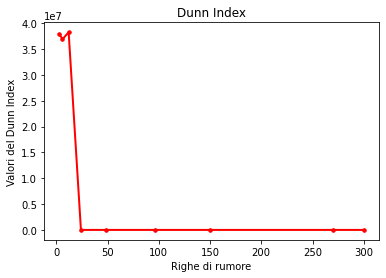

In [62]:
plt.plot(noises,dunns, color='red', linewidth = 2, marker = '.', markersize = 7)
plt.xlabel("Righe di rumore")
plt.ylabel("Valori del Dunn Index")
plt.title("Dunn Index")
plt.savefig('dunn_index.png')
plt.show()


# Real data

**1**

In [5]:
dati = pd.read_csv('journal.pone.0148699_S1_Text_Sepsis_SIRS_EDITED.csv')
dati

,Age,sex_woman,diagnosis_0EC_1M_2_AC,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality
0,23,0,2,14,0,0.02,10.48,8.66,1.22,40,7.1,176,10.0,0,1,0
1,53,0,2,10,3,9.00,19.16,16.28,0.62,0,26.3,280,10.8,0,1,0
2,83,0,2,8,4,11.91,12.60,9.91,0.72,0,13.8,98,9.2,0,1,0
3,35,0,2,3,0,7.38,7.70,5.97,0.94,20,6.4,254,7.9,0,1,0
4,86,0,2,17,2,4.97,10.64,9.73,0.78,0,12.5,133,11.8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,84,1,1,18,3,0.30,6.71,5.26,0.81,30,6.5,145,9.7,0,6,0
1253,30,1,1,3,0,0.10,7.89,3.43,3.47,30,1.0,268,10.3,0,1,0
1254,62,1,1,19,6,4.50,4.49,3.53,0.31,20,11.4,188,8.6,0,15,0
1255,31,1,1,16,5,2.00,8.40,6.69,0.76,20,8.8,164,9.0,1,4,0


In [7]:
dati.describe()

,Age,sex_woman,diagnosis_0EC_1M_2_AC,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,56.505967,0.408115,0.546539,13.336516,2.582339,6.185084,11.767942,9.900497,1.034519,27.239459,13.116627,194.361973,10.127741,0.350835,4.435959,0.102625
std,19.235512,0.491680,0.566816,8.209763,3.253823,8.241324,5.962340,5.338879,0.755753,42.282799,15.289847,107.593931,3.722421,0.477421,8.526331,0.303590
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.200000,0.005000,0.000000,0.500000,11.000000,0.000000,0.000000,1.000000,0.000000
25%,41.000000,0.000000,0.000000,7.000000,0.000000,0.700000,7.740000,6.190000,0.550000,0.000000,6.900000,120.000000,9.400000,0.000000,1.000000,0.000000
50%,58.000000,0.000000,1.000000,11.000000,1.000000,3.000000,10.790000,9.020000,0.860000,10.000000,10.500000,184.000000,10.000000,0.000000,1.000000,0.000000
75%,71.000000,1.000000,1.000000,18.000000,4.000000,8.000000,14.890000,12.730000,1.280000,40.000000,15.500000,247.000000,10.800000,1.000000,4.000000,0.000000
max,99.000000,1.000000,2.000000,48.000000,16.000000,52.050000,51.080000,50.500000,6.970000,410.000000,420.800000,854.000000,107.000000,1.000000,96.000000,1.000000


In [6]:
dati.shape

(1257, 16)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

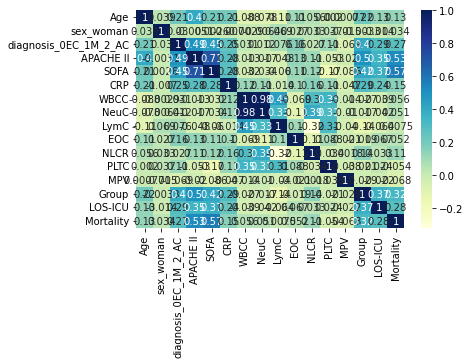

In [50]:
sns.heatmap(dati.corr(), cmap="YlGnBu", annot=True)
plt.savefig('Test1_H.png')

In [39]:
index_0 = 0
dunn_indexes = []
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(dati)
    dist = pairwise_distances(dati)
    index = dunn(dist, labels)
    
    dunn_indexes.append(index)
    if index > index_0:
        index_0 = index
        k = i
                 
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 0.018896583832546672 con 4 cluster


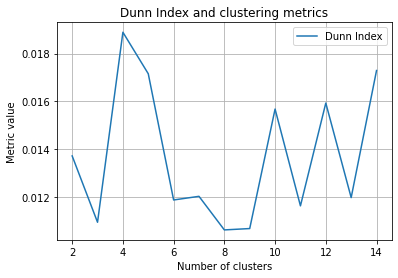

In [40]:
#plt.figure(figsize=(10,6))
plt.plot( range(2,15), dunn_indexes, label='Dunn Index')
plt.xlabel('Number of clusters')
plt.ylabel('Metric value')
plt.title('Dunn Index and clustering metrics')
plt.legend()
plt.grid(True)
plt.savefig('Test1.png')
plt.show()

**2**

In [20]:
dati_2 = pd.read_csv('journal.pone.0175818_S1Dataset_Spain_cardiac_arrest_EDITED.csv')
dati_2

,Exitus,sex_woman,Age_years,Endotracheal_intubation,Functional_status,Asystole,Cardiac_arrest_at_home,Bystander,Time_min,Cardiogenic
0,1,0,33.0,1,3.0,1,1,1,6,1
1,1,1,39.0,1,3.0,1,1,1,11,1
2,1,0,49.0,1,3.0,0,0,1,24,0
3,0,0,49.0,1,3.0,0,1,1,8,1
4,1,0,50.0,1,3.0,0,0,1,16,1
...,...,...,...,...,...,...,...,...,...,...
417,1,0,72.0,1,3.0,0,1,1,10,1
418,1,0,63.0,1,3.0,1,1,1,20,1
419,1,0,69.0,1,2.0,1,0,0,10,1
420,1,0,65.0,1,3.0,0,1,0,16,0


In [21]:
dati_2.isnull().sum()

Exitus                     0
sex_woman                  0
Age_years                  4
Endotracheal_intubation    0
Functional_status          3
Asystole                   0
Cardiac_arrest_at_home     0
Bystander                  0
Time_min                   0
Cardiogenic                0
dtype: int64

In [22]:
dati_2 = dati_2.dropna()

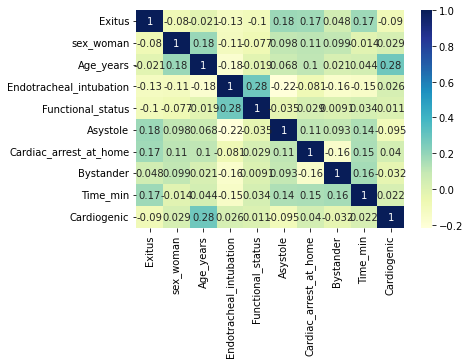

In [51]:
sns.heatmap(dati_2.corr(), cmap="YlGnBu", annot=True)
plt.savefig('Test2_H.png')

In [41]:
index_0 = 0
dunn_indexes = []
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(dati_2)
    dist = pairwise_distances(dati_2)
    index = dunn(dist, labels)
    dunn_indexes.append(index)
    if index > index_0:
        index_0 = index
        k = i
                 
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 0.06989988186929946 con 14 cluster


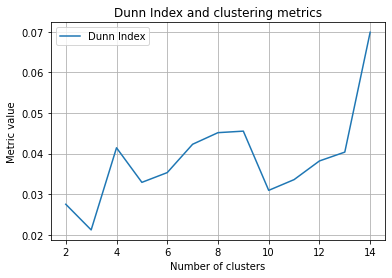

In [42]:
plt.plot( range(2,15), dunn_indexes, label='Dunn Index')
plt.xlabel('Number of clusters')
plt.ylabel('Metric value')
plt.title('Dunn Index and clustering metrics')
plt.legend()
plt.grid(True)
plt.savefig('Test2.png')
plt.show()

**3**

In [26]:
dati_3 = pd.read_csv('Takashi2019_diabetes_type1_dataset_preprocessed.csv')
dati_3

,age,duration.of.diabetes,body_mass_index,TDD,basal,bolus,HbA1c,eGFR,perc.body.fat,adiponectin,free.testosterone,SMI,grip.strength,knee.extension.strength,gait.speed,ucOC,OC,weight_kg,insulin_regimen_binary,sex_0man_1woman
0,31,17,22,43.7,6.3,37.4,6.3,82.9,0.2,14.3,0.8,6.9,30.3,18.2,0.8,19.1,49.6,54.625000,0,1
1,31,25,26,64.0,16.0,48.0,7.8,92.4,0.3,10.0,9.8,7.5,39.7,25.2,1.5,4.0,17.4,80.000000,1,0
2,32,26,21,27.4,10.5,16.9,5.8,84.9,0.2,16.1,1.1,6.1,18.4,18.2,1.2,2.0,10.8,54.800000,0,1
3,25,17,21,60.0,14.1,45.9,7.2,92.7,0.2,6.6,1.3,6.5,31.2,17.8,1.4,3.5,14.5,50.000000,1,1
4,39,35,33,61.0,21.3,39.6,7.6,108.6,0.4,13.8,10.0,8.3,42.1,23.9,1.3,2.5,12.2,101.666667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,36,28,19,47.0,30.1,16.9,9.2,50.7,0.2,14.5,0.7,5.9,24.7,25.2,1.7,16.1,44.4,47.000000,1,1
63,47,34,25,28.0,7.0,21.0,6.9,76.8,0.3,11.8,5.3,7.3,25.6,13.4,1.5,2.1,12.9,56.000000,1,0
64,21,15,26,72.0,25.9,46.1,7.9,114.2,0.2,13.4,17.3,8.0,39.9,26.1,1.5,8.4,27.1,72.000000,1,0
65,36,29,24,34.0,16.0,18.0,6.8,93.7,0.2,10.8,8.0,8.0,54.5,29.2,1.7,4.8,17.0,68.000000,1,0


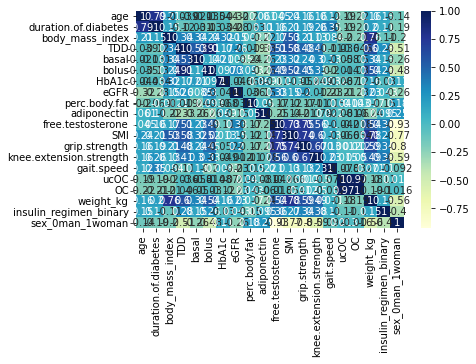

In [52]:
sns.heatmap(dati_3.corr(), cmap="YlGnBu", annot=True)
plt.savefig('Test3_H.png')

In [56]:
np.cov(dati_3)

array([[501.04508388, 543.58498684, 408.30836842, ..., 600.01638158,
        477.14316447, 441.42731798],
       [543.58498684, 729.99694737, 516.962     , ..., 772.12894737,
        616.15205263, 573.08040351],
       [408.30836842, 516.962     , 439.09957895, ..., 552.68157895,
        491.16663158, 483.53652632],
       ...,
       [600.01638158, 772.12894737, 552.68157895, ..., 867.99736842,
        654.62394737, 617.67289474],
       [477.14316447, 616.15205263, 491.16663158, ..., 654.62394737,
        614.22134211, 533.96164035],
       [441.42731798, 573.08040351, 483.53652632, ..., 617.67289474,
        533.96164035, 540.49584503]])

In [43]:
index_0 = 0
dunn_indexes = []
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(dati_3)
    dist = pairwise_distances(dati_3)
    index = dunn(dist, labels)
    dunn_indexes.append(index)
    if index > index_0:
        index_0 = index
        k = i
                 
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 0.3465493051474575 con 10 cluster


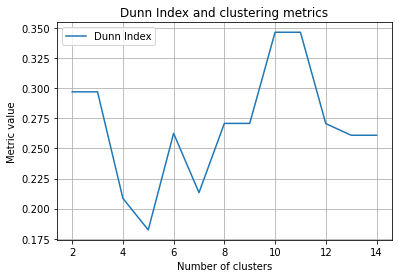

In [45]:
plt.plot( range(2,15), dunn_indexes, label='Dunn Index')
plt.xlabel('Number of clusters')
plt.ylabel('Metric value')
plt.title('Dunn Index and clustering metrics')
plt.grid(True)
plt.legend()
plt.savefig('Test3.png')
plt.show()

**4**

In [30]:
dati_4 = pd.read_csv('journal.pone.0158570_S2File_depression_heart_failure.csv')
dati_4

,id,Age (years),"Male (1=Yes, 0=No)",PHQ-9,Systolic BP (mm Hg),Estimated glomerular filtration rate,Ejection fraction (%),Serum sodium (mmol/l),Blood urea nitrogen (mg/dl),"Etiology HF(1=Yes, 0=No)",Prior diabetes mellitus,"Elevated level of BNP/NT-BNP (1=Yes, 0=No)",Time from HF to Death (days),"Death (1=Yes, 0=No)",Time from HF to hospitalization (days),"Hospitalized (1=Yes, 0=No)"
0,11,93,0,1,145.0,46.352457,60.50,137,26,1,1,1,679,1,134,1
1,12,99,1,8,115.0,32.827851,65.00,140,75,1,0,1,74,1,74,0
2,13,83,1,4,121.0,57.821591,65.00,141,28,0,0,1,730,0,224,1
3,15,86,1,4,113.0,63.469884,32.50,141,47,0,1,1,730,0,5,1
4,16,84,1,3,142.0,57.681188,58.00,137,32,0,1,1,730,0,730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,602,50,1,3,143.0,79.094655,49.50,137,27,1,1,1,730,0,156,1
421,604,73,1,11,155.0,29.486806,58.00,139,42,0,0,1,730,0,730,0
422,606,63,1,17,135.0,113.901326,27.40,130,17,0,1,1,338,1,338,0
423,609,48,1,4,172.0,58.919011,16.83,140,34,0,0,1,730,0,730,0


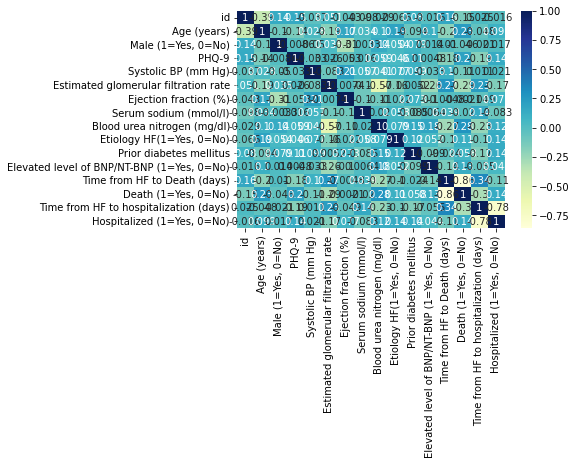

In [53]:
sns.heatmap(dati_4.corr(), cmap="YlGnBu", annot=True)
plt.savefig('Test4_H.png')

In [46]:
index_0 = 0
dunn_indexes = []
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(dati_4)
    dist = pairwise_distances(dati_4)
    index = dunn(dist, labels)
    dunn_indexes.append(index)
    if index > index_0:
        index_0 = index
        k = i
                 
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 0.100155597474129 con 4 cluster


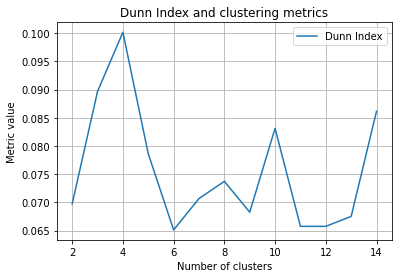

In [47]:
plt.plot( range(2,15), dunn_indexes, label='Dunn Index')
plt.xlabel('Number of clusters')
plt.ylabel('Metric value')
plt.title('Dunn Index and clustering metrics')
plt.legend()
plt.grid(True)
plt.savefig('Test4.png')
plt.show()

**5**

In [82]:
dati_5 = pd.read_csv('10_7717_peerj_5665_dataYM2018_neuroblastoma.csv')
dati_5

,age,sex,site,stage,risk,time_months,autologous_stem_cell_transplantation,radiation,degree_of_differentiation,UH_or_FH,MYCN_status,surgical_methods,outcome
0,2.0,0,0,1.0,1,7,0,0,0,0,1,1,0.0
1,2.0,0,0,1.0,1,19,0,1,0,0,1,1,1.0
2,1.0,0,0,1.0,1,25,0,1,1,0,1,0,1.0
3,1.0,0,0,1.0,1,8,0,0,1,0,1,1,0.0
4,1.0,0,0,1.0,1,47,1,1,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0,0,0.0,0,32,0,0,0,0,1,0,0.0
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,,,NaN,,,,,,,,,NaN
171,NaN,NaN,,NaN,NaN,NaN,,,,,NaN,NaN,NaN


In [76]:
dati_5['time_months'].unique()

array(['7', '19', '25', '8', '47', '27', '50', '64', '28', '13', '20',
       '52', '84', '34', '23', '57', '41', '36', '29', '53', '56', '77',
       '37', '69', '22', '63', '60', '59', '9', '58', '11', '54', '1.5',
       '35', '15', '45', '48', '46', '44', '24', '32', '21', '40', '38',
       '30', '6', '31', '4', '51', '10', '14', '12', '71', '1', '17',
       '93', '100', '82', '62', '42', '16', '75', '70', '65', '83', '80',
       '68', '66', '67', '49', '18'], dtype=object)

In [61]:
dati_5.isnull().sum()

age                                     4
sex                                     3
site                                    1
stage                                   4
risk                                    3
time_months                             3
autologous_stem_cell_transplantation    2
radiation                               2
degree_of_differentiation               2
UH_or_FH                                2
MYCN_status                             3
surgical_methods                        3
outcome                                 4
dtype: int64

In [85]:
dati_5.columns

Index(['age', 'sex', 'site', 'stage', 'risk', 'time_months',
       'autologous_stem_cell_transplantation', 'radiation',
       'degree_of_differentiation', 'UH_or_FH', 'MYCN_status ',
       'surgical_methods', 'outcome'],
      dtype='object')

In [64]:
dati_5 = dati_5.dropna()

In [68]:
dati_5.dtypes

age                                     float64
sex                                      object
site                                     object
stage                                   float64
risk                                     object
time_months                              object
autologous_stem_cell_transplantation     object
radiation                                object
degree_of_differentiation                object
UH_or_FH                                 object
MYCN_status                              object
surgical_methods                         object
outcome                                 float64
dtype: object

In [87]:
dati_5['sex'] = pd.to_numeric(dati_5['sex'], errors='coerce').astype('Int64')
dati_5['site'] = pd.to_numeric(dati_5['site'], errors='coerce').astype('Int64')
dati_5['stage'] = pd.to_numeric(dati_5['stage'], errors='coerce').astype('Int64')
dati_5['risk'] = pd.to_numeric(dati_5['risk'], errors='coerce').astype('Int64')
dati_5.loc[:, 'time_months'] = pd.to_numeric(dati_5['time_months'], errors='coerce').astype('Float64')
dati_5['autologous_stem_cell_transplantation'] = pd.to_numeric(dati_5['autologous_stem_cell_transplantation'], errors='coerce').astype('Int64')
dati_5['radiation'] = pd.to_numeric(dati_5['radiation'], errors='coerce').astype('Int64')
dati_5['degree_of_differentiation'] = pd.to_numeric(dati_5['degree_of_differentiation'], errors='coerce').astype('Int64')
dati_5['UH_or_FH'] = pd.to_numeric(dati_5['UH_or_FH'], errors='coerce').astype('Int64')
dati_5['MYCN_status '] = pd.to_numeric(dati_5['MYCN_status '], errors='coerce').astype('Int64')
dati_5['surgical_methods'] = pd.to_numeric(dati_5['surgical_methods'], errors='coerce').astype('Int64')

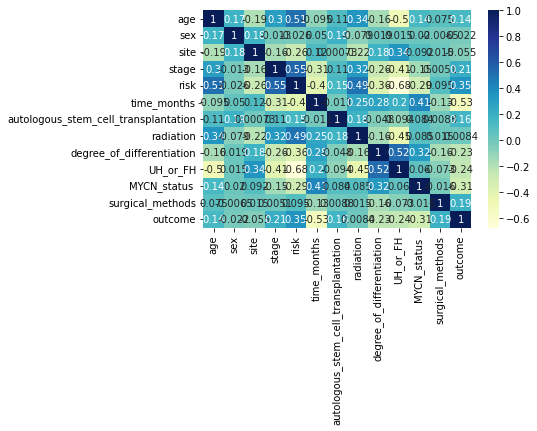

In [89]:
sns.heatmap(dati_5.corr(), cmap="YlGnBu", annot=True)
plt.savefig('Test5_H.png')

In [51]:
dati_5.isnull().sum()

age                                     4
sex                                     3
site                                    1
stage                                   4
risk                                    3
time_months                             3
autologous_stem_cell_transplantation    2
radiation                               2
degree_of_differentiation               2
UH_or_FH                                2
MYCN_status                             3
surgical_methods                        3
outcome                                 4
dtype: int64

In [35]:
dati_5 = dati_5.dropna()

In [63]:
dati_5

,age,sex,site,stage,risk,time_months,autologous_stem_cell_transplantation,radiation,degree_of_differentiation,UH_or_FH,MYCN_status,surgical_methods,outcome
0,2.0,0,0,1.0,1,7,0,0,0,0,1,1,0.0
1,2.0,0,0,1.0,1,19,0,1,0,0,1,1,1.0
2,1.0,0,0,1.0,1,25,0,1,1,0,1,0,1.0
3,1.0,0,0,1.0,1,8,0,0,1,0,1,1,0.0
4,1.0,0,0,1.0,1,47,1,1,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0,0,0.0,0,36,0,0,0,0,1,0,0.0
165,1.0,0,0,0.0,0,18,0,0,1,1,1,1,1.0
166,1.0,1,1,0.0,0,38,0,0,2,1,1,0,0.0
167,1.0,1,1,0.0,0,37,0,0,1,1,1,0,0.0


In [48]:
index_0 = 0
dunn_indexes = []
for i in range(2,15):
    kmeans = KMeans(n_clusters= i, random_state=42)
    labels = kmeans.fit_predict(dati_5)
    dist = pairwise_distances(dati_5)
    index = dunn(dist, labels)
    dunn_indexes.append(index)
    if index > index_0:
        index_0 = index
        k = i
                 
print('Dunn Index =', index_0, 'con', k,'cluster')

Dunn Index = 0.19611613513818404 con 14 cluster


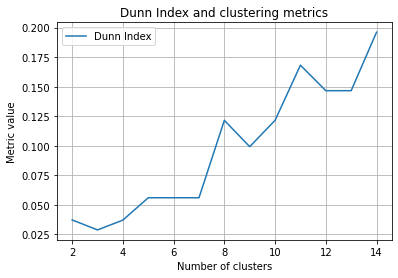

In [49]:
plt.plot( range(2,15), dunn_indexes, label='Dunn Index')
plt.xlabel('Number of clusters')
plt.ylabel('Metric value')
plt.title('Dunn Index and clustering metrics')
plt.legend()
plt.grid(True)
plt.savefig('Test5.png')
plt.show()